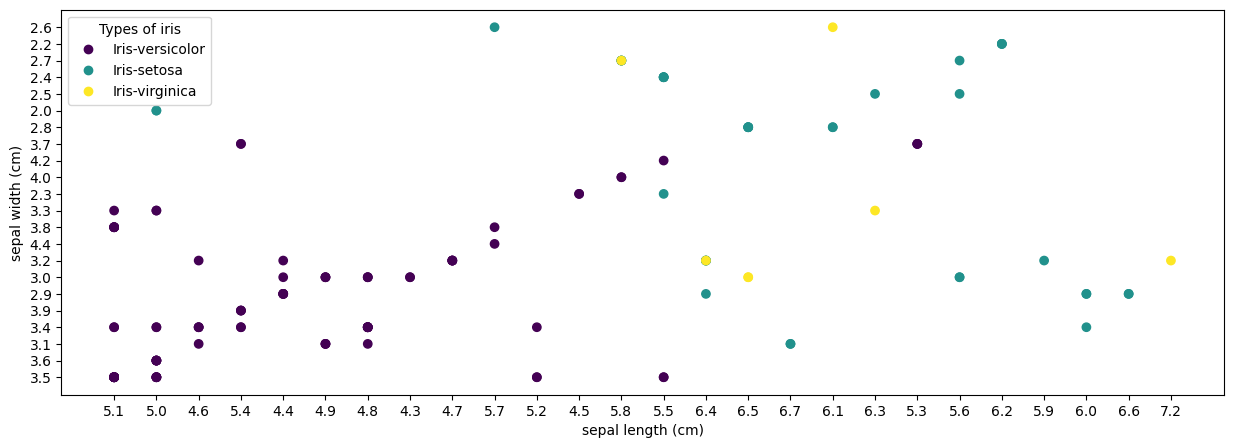

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import random
from sklearn import datasets

FIT_PERCENTAGE = 10
IRIS_VERSICOLOR = 'Iris-versicolor'
IRIS_SETOSA = 'Iris-setosa'
IRIS_VIRGINICA = 'Iris-virginica'
FEATURE_NAMES = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
TARGET_NAMES = [IRIS_VERSICOLOR, IRIS_SETOSA, IRIS_VIRGINICA]

dataset = np.genfromtxt("../datasets/Iris.csv", delimiter=",", dtype=str, skip_header=1)
dataset = np.delete(dataset, [0], 1)
random.shuffle(dataset)

def get_output_value(value): 
  if value == IRIS_SETOSA:
    return 0
  
  if value == IRIS_VERSICOLOR:
    return 1
  
  if value == IRIS_VIRGINICA:
    return 2

def parse_outputs(data):
  return list(map(get_output_value, data))

def get_x_and_y_Columns(dataset,x_columns, y_columns):
  x_values = np.delete(dataset, x_columns, 1)
  y_values = np.delete(dataset, y_columns, 1)

  return x_values, parse_outputs(y_values)

def setup_variables(dataset):
  #remove name columns
  dataset = np.delete(dataset, [0], 0)

  dataset_length = len(dataset)
  fit_length = int(FIT_PERCENTAGE * dataset_length / 100)

  fit_dataset = dataset[-fit_length:]
  train_dataset = dataset[:dataset_length-fit_length]

  fit_x, fit_y = get_x_and_y_Columns(fit_dataset,[4],[0,1,2,3])
  train_x, train_y = get_x_and_y_Columns(train_dataset,[4],[0,1,2,3])

  return fit_x, fit_y, train_x, train_y

fit_x, fit_y, train_x, train_y = setup_variables(dataset)


figure, ax = plt.subplots()
figure.set_figwidth(15)
figure.set_figheight(5)
scatter = ax.scatter(train_x[:,0], train_x[:,1], c=train_y)
ax.set(xlabel=FEATURE_NAMES[0], ylabel=FEATURE_NAMES[1])
_ = ax.legend(
    scatter.legend_elements()[0], TARGET_NAMES, loc="upper left", title="Types of iris"
)




